# Homework 3 - Activity 3

**Name:** -- Federico Garcia Rodriguez --

**e-mail:** -- federico.garcia0747@alumnos.udg.mx --

**code:** -- 224807479 --

# MODULES

In [1]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import math

from scipy.stats import wrapcauchy
from scipy.stats import levy_stable
from scipy.stats import exponweib

import plotly.graph_objects as go

# Turning angle distribution - source dist. vs observed dist.)

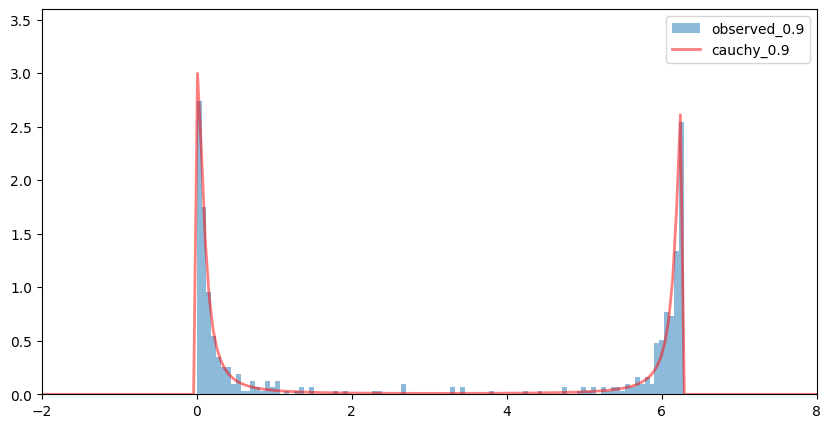

In [9]:
CRW_exponent = 0.9
n_steps = 500

resolution = 200

aux_domain = np.linspace(-2,8, resolution)

cauchy_pdf = np.array([wrapcauchy.pdf(i, CRW_exponent) for i in aux_domain])

#CRW_2d = np.ones(shape=(n_steps,2))*s_pos
r = wrapcauchy.rvs(CRW_exponent, size=n_steps)

fig, ax = plt.subplots(1,1)

fig.set_figheight(5)
fig.set_figwidth(10)

ax.hist(r, bins=100, density=True, histtype='stepfilled', alpha=0.5, label='observed_0.9')

ax.plot(aux_domain, cauchy_pdf, 'r-', lw = 2, alpha=0.5, label='cauchy_0.9')

ax.set_xticks(np.arange(-2, 10, 2))
ax.margins(0.2, 0.2)
ax.autoscale(enable=True, axis="x", tight=True)
ax.legend(loc='best')

plt.show()